# K- nearest Neighbor algorithm uses the data to and classify new data points based on the similarity measures of the data.

#### The KNN algorithm is :-

1. First Load the data
2. Then Initialize K to your chosen number of neighbors
3. For each example in the data
    - Calculate the distance between the query example and the current example from the data.
    - Add the distance and the index of the example to an ordered collection
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
5. Pick the first K entries from the sorted collection
6. Get the labels of the selected K entries
7. If regression, return the mean of the K labels
8. If classification, return the mode of the K labels

## First we import the necessary python libraries

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## To import the heart dataset and to print the first 5 rows in the imported dataset

In [134]:
df = pd.read_csv('/Users/Moiz/Desktop/heart.csv')

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Now to print the shape of the dataset

In [135]:
df.shape

(303, 14)

## Now we create arrays for target and features

In [136]:
X = df.drop('target',axis=1).values
y = df['target'].values

## Now we split the dataset as train and test and we keep the tarining dataset as 80% and test dataset as 20%

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42, stratify=y)

We have split the dataset using a pre-defined function.

## To import Neighbors Classifier using Scikit Learn

In [138]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1,9)                     #to Setup the arrays to store the dataset
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)         #to Setup a knn classifier with k neighbors
    
    knn.fit(X_train, y_train)                        #for Fitting the model

    
    train_accuracy[i] = knn.score(X_train, y_train)  #To compute the accuracy on the training set

    
    test_accuracy[i] = knn.score(X_test, y_test)        #To Compute the accuracy on the test set

## Generating the plot

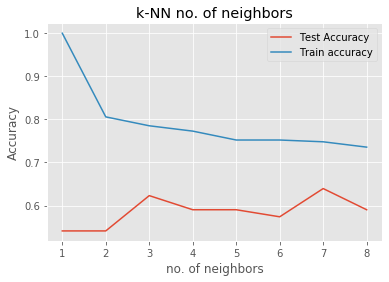

In [139]:
plt.title('k-NN no. of neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train accuracy')
plt.legend()
plt.xlabel('no. of neighbors')
plt.ylabel('Accuracy')
plt.show()

## Setup a knn classifier with k neighbors as 7

In [140]:
knn = KNeighborsClassifier(n_neighbors=7)

In [141]:
knn.fit(X_train,y_train)               #Fitting the model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [142]:
knn.score(X_test,y_test)               #To calculate the accuracy.

0.639344262295082

So we can observe the accuracy of the knn score as 63%

In [180]:
from sklearn.model_selection import GridSearchCV       #to import the GridSearchCV

In [184]:
k_range = range(1,25)
ks= []
ks1 = []
for k in k_range:
    knn1 = KNeighborsClassifier(n_neighbors=k)
    scores = knn_cv(estimator = knn1, X = X_train, y = y_train, cv = 10, scoring='accuracy')
    ks.append([k,scores.mean()])
    ks1.append(scores.mean())

  
print('Maximum accuracy:',max(ks1))

SyntaxError: invalid syntax (<ipython-input-184-1c63c6c5a10b>, line 1)

## In case of classifier like knn the parameter to be tuned is n neighbors

In [144]:
param_grid = {'n_neighbors':np.arange(1,50)}

In [145]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=10)
knn_cv.fit(X,y)

C:\Users\Moiz\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [146]:
knn_cv.best_score_

0.6798679867986799

In [147]:
knn_cv.best_params_

{'n_neighbors': 27}

## CONCLUSION : 
So we observe the accuracy of the cross validation lower than the accuracy of the knn classifier model, it means that the model is underfitted, and the accuracy is incorrect.

### REFERENCE : https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761